In [83]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def create_linked_list(values):
    if not values:
        return None

    head = Node(values[0])
    current = head

    for value in values[1:]:
        new_node = Node(value)
        current.next = new_node
        current = new_node

    return head

def display_linked_list(head):
    current = head
    while current:
        print(current.data, end=" -> ")
        current = current.next
    print("None")
    

# Example usage:
values = [1, 2, 3, 4, 5]
linked_list_head = create_linked_list(values)

print("Linked List:")
display_linked_list(linked_list_head)

Linked List:
1 -> 2 -> 3 -> 4 -> 5 -> None


Insert Node at begining

In [65]:
def insert_at_beginning(head=linked_list_head, data=0):
    new_node = Node(data)
    new_node.next = head
    return new_node

head=insert_at_beginning()
display_linked_list(head=head)


0 -> 1 -> 2 -> 3 -> 4 -> 5 -> None


Delte Node with Value

In [66]:
def delete_node(head, value_to_delete):
    current = head

    # Check if the node to be deleted is the head
    if current and current.data == value_to_delete:
        return current.next

    # Find the node to delete and its previous node
    prev, current = None, head
    while current and current.data != value_to_delete:
        prev, current = current, current.next

    # Print a message if the node is not found
    if not current:
        print(f"Node with value {value_to_delete} not found.")
        return head

    # Update the pointers to skip the node to be deleted
    prev.next = current.next

    return head

head=delete_node(head=head,value_to_delete=2)
display_linked_list(head=head)

0 -> 1 -> 3 -> 4 -> 5 -> None


Length of Linked List

In [67]:
def find_length(head):
    count = 0
    current = head

    while current:
        count += 1
        current = current.next
        
    print(count)

    return count

find_length(head=head)

5


5

Search element in Linked list 

In [68]:
def search_element(head, target):
    current = head

    while current:
        if current.data == target:
            return True
        current = current.next

    return False

search_element(head=head, target=3)

True

Middle Of element 

In [69]:
def find_middle(head):
    slow_ptr = head
    fast_ptr = head

    while fast_ptr and fast_ptr.next:
        slow_ptr = slow_ptr.next
        fast_ptr = fast_ptr.next.next

    return slow_ptr.data

find_middle(head=head)

3

Reversed Linked List

In [70]:
display_linked_list(head=head)

0 -> 1 -> 3 -> 4 -> 5 -> None


In [71]:
def reverse_linked_list(head):
    prev = None
    current = head

    while current:
        next_node = current.next
        current.next = prev
        prev = current
        current = next_node

    return prev  # new head of the reversed linked list

reversed_head=reverse_linked_list(head=head)
display_linked_list(head=reversed_head)

5 -> 4 -> 3 -> 1 -> 0 -> None


In [72]:
display_linked_list(head=reversed_head)

5 -> 4 -> 3 -> 1 -> 0 -> None


In [73]:
def reverse_linked_list_recursive(node, prev=None):
    if not node:
        return prev

    next_node = node.next
    node.next = prev

    return reverse_linked_list_recursive(next_node, node)
#head=reverse_linked_list_recursive(node=reversed_head, prev=None)


#display_linked_list(head=head)

Circular Linked List

In [77]:
def create_circular_linked_list(values):
    if not values:
        return None

    head = Node(values[0])
    current = head

    for value in values[1:]:
        new_node = Node(value)
        current.next = new_node
        current = new_node

    # Make the last node point back to the head, forming a circular linked list
    current.next = head

    return head

# Example usage:
values = [1, 2, 3, 4, 5]
circular_linked_list_head = create_circular_linked_list(values)

def display_circular_linked_list(head):
    if not head:
        return

    current = head
    while True:
        print(current.data, end=" -> ")
        current = current.next
        if current == head:
            break
    print(" (Circular)")
    
    
display_circular_linked_list(head=circular_linked_list_head)

1 -> 2 -> 3 -> 4 -> 5 ->  (Circular)


Detect Loop

In [78]:
def detect_loop(head):
    slow_ptr = head
    fast_ptr = head

    while fast_ptr and fast_ptr.next:
        slow_ptr = slow_ptr.next
        fast_ptr = fast_ptr.next.next

        if slow_ptr == fast_ptr:
            return True  # Loop detected

    return False  # No loop


detect_loop(head=circular_linked_list_head)

True

Detect Heat of Ciruclar Linked List Loop

In [79]:
def find_start_of_loop(head):
    slow_ptr = head
    fast_ptr = head

    # Detect the loop (Floyd's cycle-finding algorithm)
    while fast_ptr and fast_ptr.next:
        slow_ptr = slow_ptr.next
        fast_ptr = fast_ptr.next.next

        if slow_ptr == fast_ptr:
            break  # Loop detected

    # Reset one pointer to the head and move both pointers one node at a time
    slow_ptr = head
    while slow_ptr != fast_ptr:
        slow_ptr = slow_ptr.next
        fast_ptr = fast_ptr.next

    return slow_ptr.data  # Starting point of the loop

find_start_of_loop(head=circular_linked_list_head)

1

Length of Loop in LL

In [80]:
def find_length_of_loop(head):
    slow_ptr = head
    fast_ptr = head
    loop_detected = False

    # Detect the loop (Floyd's cycle-finding algorithm)
    while fast_ptr and fast_ptr.next:
        slow_ptr = slow_ptr.next
        fast_ptr = fast_ptr.next.next

        if slow_ptr == fast_ptr:
            loop_detected = True
            break  # Loop detected

    if not loop_detected:
        return 0  # No loop

    # Count the number of nodes in the loop
    count = 1
    slow_ptr = slow_ptr.next
    while slow_ptr != fast_ptr:
        slow_ptr = slow_ptr.next
        count += 1

    return count  # Length of the loop

find_length_of_loop(head=circular_linked_list_head)


5

Plaindrome 

In [81]:
def is_palindrome(head):
    # Helper function to reverse a linked list
    def reverse_linked_list(node):
        prev = None
        current = node

        while current:
            next_node = current.next
            current.next = prev
            prev = current
            current = next_node

        return prev

    # Find the middle of the linked list
    slow_ptr = head
    fast_ptr = head

    while fast_ptr and fast_ptr.next:
        slow_ptr = slow_ptr.next
        fast_ptr = fast_ptr.next.next

    # Reverse the second half of the linked list
    second_half_head = reverse_linked_list(slow_ptr)

    # Compare the reversed second half with the first half
    first_half = head
    second_half = second_half_head

    while second_half:
        if first_half.data != second_half.data:
            return False
        first_half = first_half.next
        second_half = second_half.next

    return True

is_palindrome(head=linked_list_head)


False

Even Odd head 

In [88]:
def rearrange_even_odd(head):
    # Corner case
    if not head or not head.next:
        return head

    odd = head
    even = head.next
    even_first = even

    while even and even.next:
        odd.next = even.next
        odd = odd.next

        even.next = odd.next
        even = even.next

    odd.next = even_first

    return head

display_linked_list(head=linked_list_head)
even_odd_head=rearrange_even_odd(head=linked_list_head)
print("Arranged Linked List")
display_linked_list(head=even_odd_head)

1 -> 5 -> 4 -> 3 -> 2 -> None
Arranged Linked List
1 -> 4 -> 2 -> 5 -> 3 -> None


Merge Sort Linked List

In [90]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def merge_sort_linked_list(head):
    # Base case: If the list is empty or has only one node, it is already sorted
    if not head or not head.next:
        return head

    # Split the linked list into two halves
    mid = find_middle(head)
    left_half = head
    right_half = mid.next
    mid.next = None  # Disconnect the two halves

    # Recursively sort each half
    left_sorted = merge_sort_linked_list(left_half)
    right_sorted = merge_sort_linked_list(right_half)

    # Merge the sorted halves
    sorted_list = merge(left_sorted, right_sorted)

    return sorted_list

def find_middle(head):
    slow_ptr = head
    fast_ptr = head

    while fast_ptr and fast_ptr.next and fast_ptr.next.next:
        slow_ptr = slow_ptr.next
        fast_ptr = fast_ptr.next.next

    return slow_ptr

def merge(left, right):
    dummy = Node(0)
    current = dummy

    while left and right:
        if left.data < right.data:
            current.next = left
            left = left.next
        else:
            current.next = right
            right = right.next

        current = current.next

    # Attach the remaining nodes (if any)
    if left:
        current.next = left
    if right:
        current.next = right

    return dummy.next

# Helper function to display linked list
def display_linked_list(head):
    current = head
    while current:
        print(current.data, end=" -> ")
        current = current.next
    print("None")

# Assuming you have a linked list and a display function


print("Original Linked List:")
display_linked_list(linked_list_head)

# Sorting the linked list using Merge Sort
sorted_linked_list = merge_sort_linked_list(linked_list_head)

print("\nSorted Linked List:")
display_linked_list(sorted_linked_list)



Original Linked List:
1 -> 4 -> 2 -> 5 -> 3 -> None

Sorted Linked List:
1 -> 2 -> 3 -> 4 -> 5 -> None


Find INtersection

In [91]:
def find_intersection(head1, head2):
    def get_length(node):
        length = 0
        while node:
            length += 1
            node = node.next
        return length

    # Find lengths of both linked lists
    len1 = get_length(head1)
    len2 = get_length(head2)

    # Initialize pointers to the heads of the linked lists
    ptr1, ptr2 = head1, head2

    # Find the absolute difference in lengths
    diff = abs(len1 - len2)

    # Move the pointer of the longer linked list by 'diff' nodes
    if len1 > len2:
        for _ in range(diff):
            ptr1 = ptr1.next
    else:
        for _ in range(diff):
            ptr2 = ptr2.next

    # Move both pointers until they meet (intersection point)
    while ptr1 and ptr2:
        if ptr1 == ptr2:
            return ptr1  # Intersection found

        ptr1 = ptr1.next
        ptr2 = ptr2.next

    return None  # No intersection found

Add Two Numbers Linked List

### Reverse Linked List

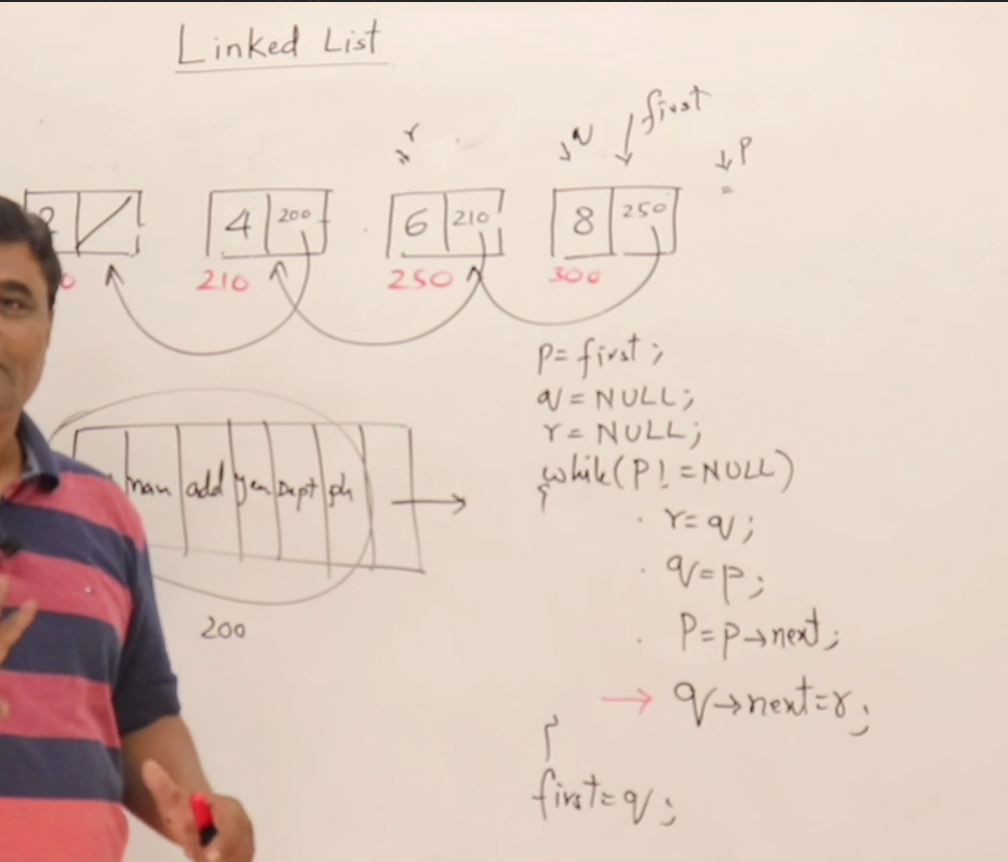

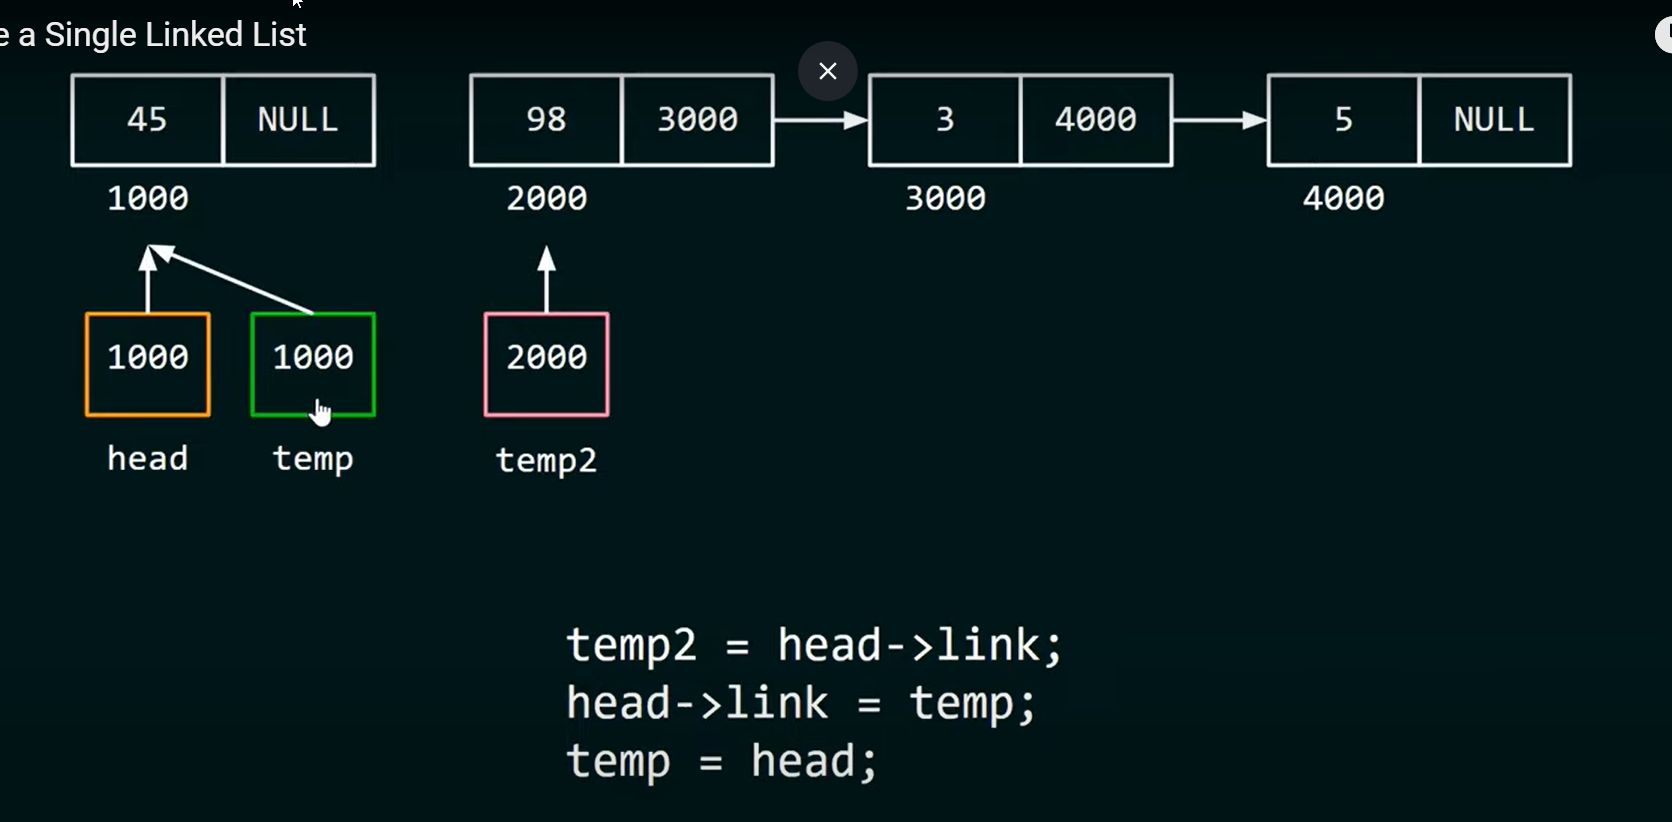

Link - "https://youtu.be/XgABnoJLtG4"

In [3]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            return
        last_node = self.head
        while last_node.next:
            last_node = last_node.next
        last_node.next = new_node

    def print_list(self):
        current_node = self.head
        while current_node:
            print(current_node.data, end=" -> ")
            current_node = current_node.next
        print("None")

    def reverse_list(self):
        prev_node = None
        current_node = self.head
        while current_node:
            next_node = current_node.next
            current_node.next = prev_node
            prev_node = current_node
            current_node = next_node
        self.head = prev_node




In [4]:
# Example usage:
ll = LinkedList()
ll.append(1)
ll.append(2)
ll.append(3)
ll.append(4)

print("Original linked list:")
ll.print_list()

ll.reverse_list()

print("\nReversed linked list:")
ll.print_list()

Original linked list:
1 -> 2 -> 3 -> 4 -> None

Reversed linked list:
4 -> 3 -> 2 -> 1 -> None


Recursive Reverse Linked List 

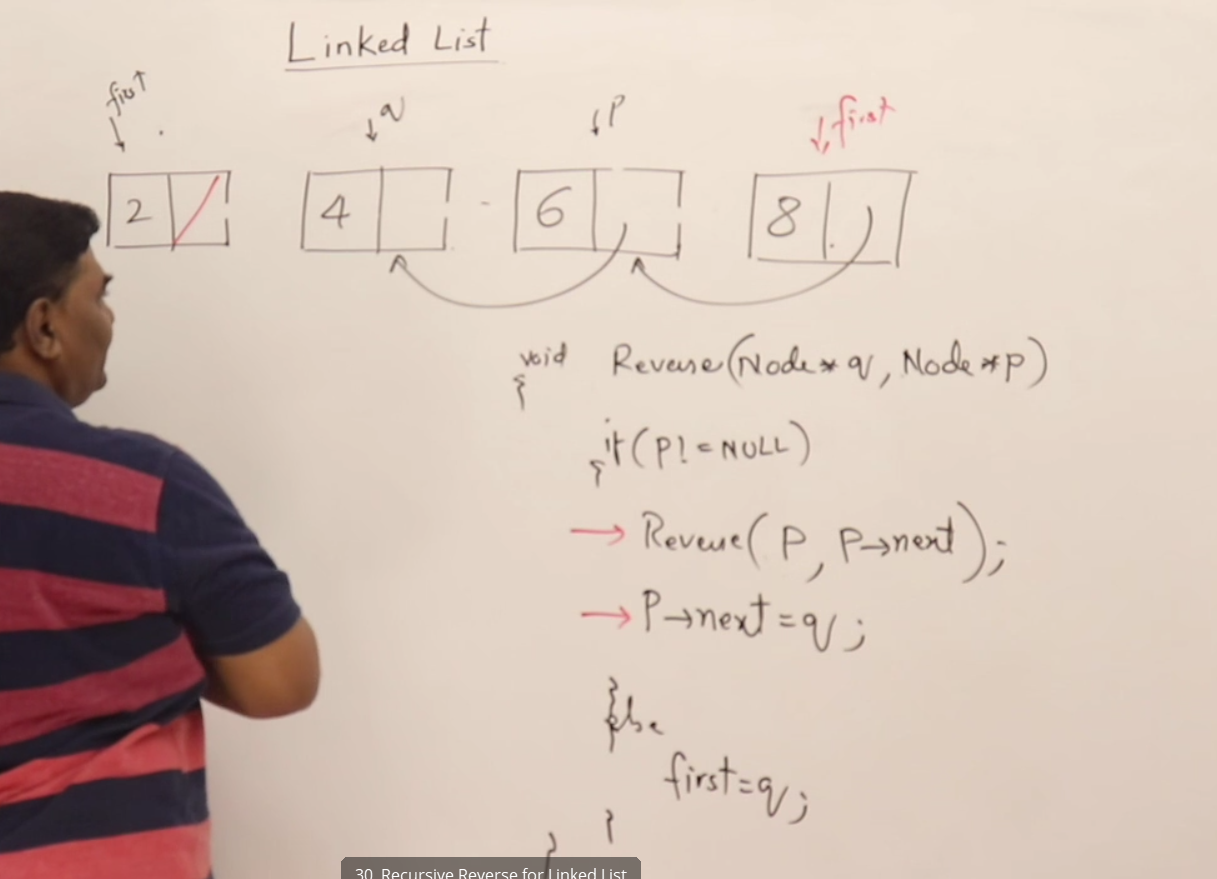

In [3]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def reverse_linked_list_two_pointers_recursive(prev, current):
    # Base case: if the current node is None, we've reached the end
    if current is None:
        return prev

    # Store the next node before reversing the link
    next_node = current.next
    
    # Reverse the link
    current.next = prev

    # Move prev and current pointers to the next nodes
    return reverse_linked_list_two_pointers_recursive(current, next_node)

# Wrapper function to handle the initial call
def reverse_linked_list_recursive(head):
    return reverse_linked_list_two_pointers_recursive(None, head)

# Example usage
# Assuming you have a linked list: 1 -> 2 -> 3 -> 4 -> 5
# Create nodes
node5 = ListNode(5)
node4 = ListNode(4, node5)
node3 = ListNode(3, node4)
node2 = ListNode(2, node3)
node1 = ListNode(1, node2)

original_head = node1
reversed_head = reverse_linked_list_recursive(original_head)




# Print the reversed linked list
while reversed_head is not None:
    print(reversed_head.value, end=" ")
    reversed_head = reversed_head.next
    
    
# Assuming you have a linked list: 1 -> 2 -> 3 -> 4 -> 5


5 4 3 2 1 

### Reorder List

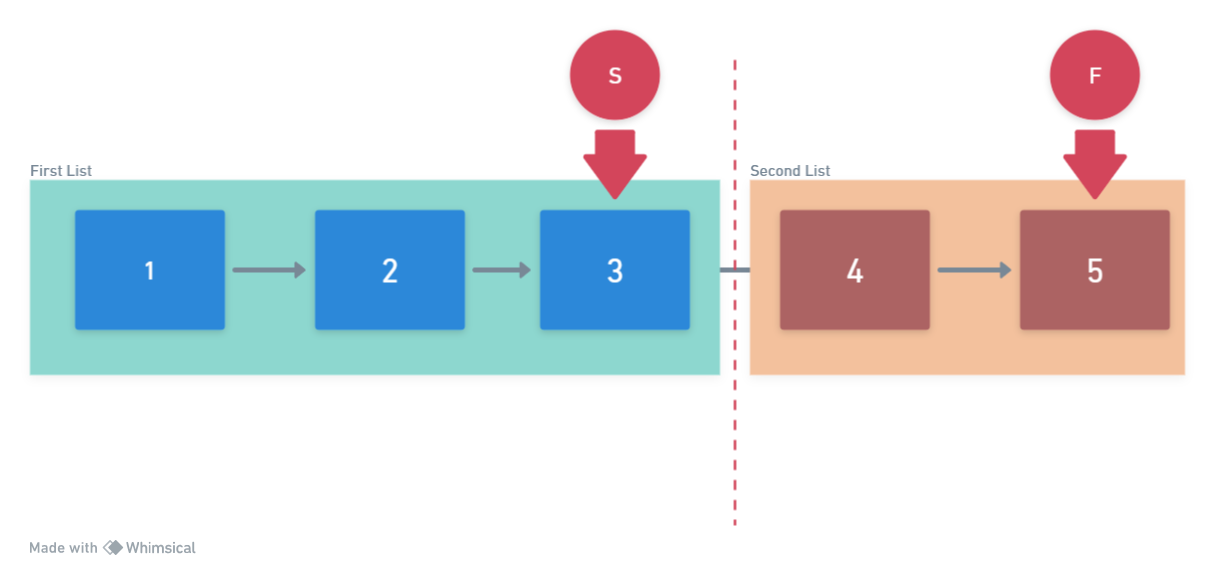

In [ ]:
class Node:
    def __init__(self,data=None,next=None) -> None:
        self.data=data 
        self.next=next


class reorder_list:
    def __init__(self,head:Node) -> None:
        slow,fast=head,head.next
        while fast and fast.next:
            slow=slow.next
            fast=fast.next.next
            
        second=slow.next 
        prev=slow.next=None
        
        while second:
            temp=second.next
            second.next=prev
            prev=second
            second=temp
            
            
        # Reversing Linked List 
        first,second=head,prev
        while second:   
            temp= second.next 
            second.next=prev    

### Removed Linked List Items

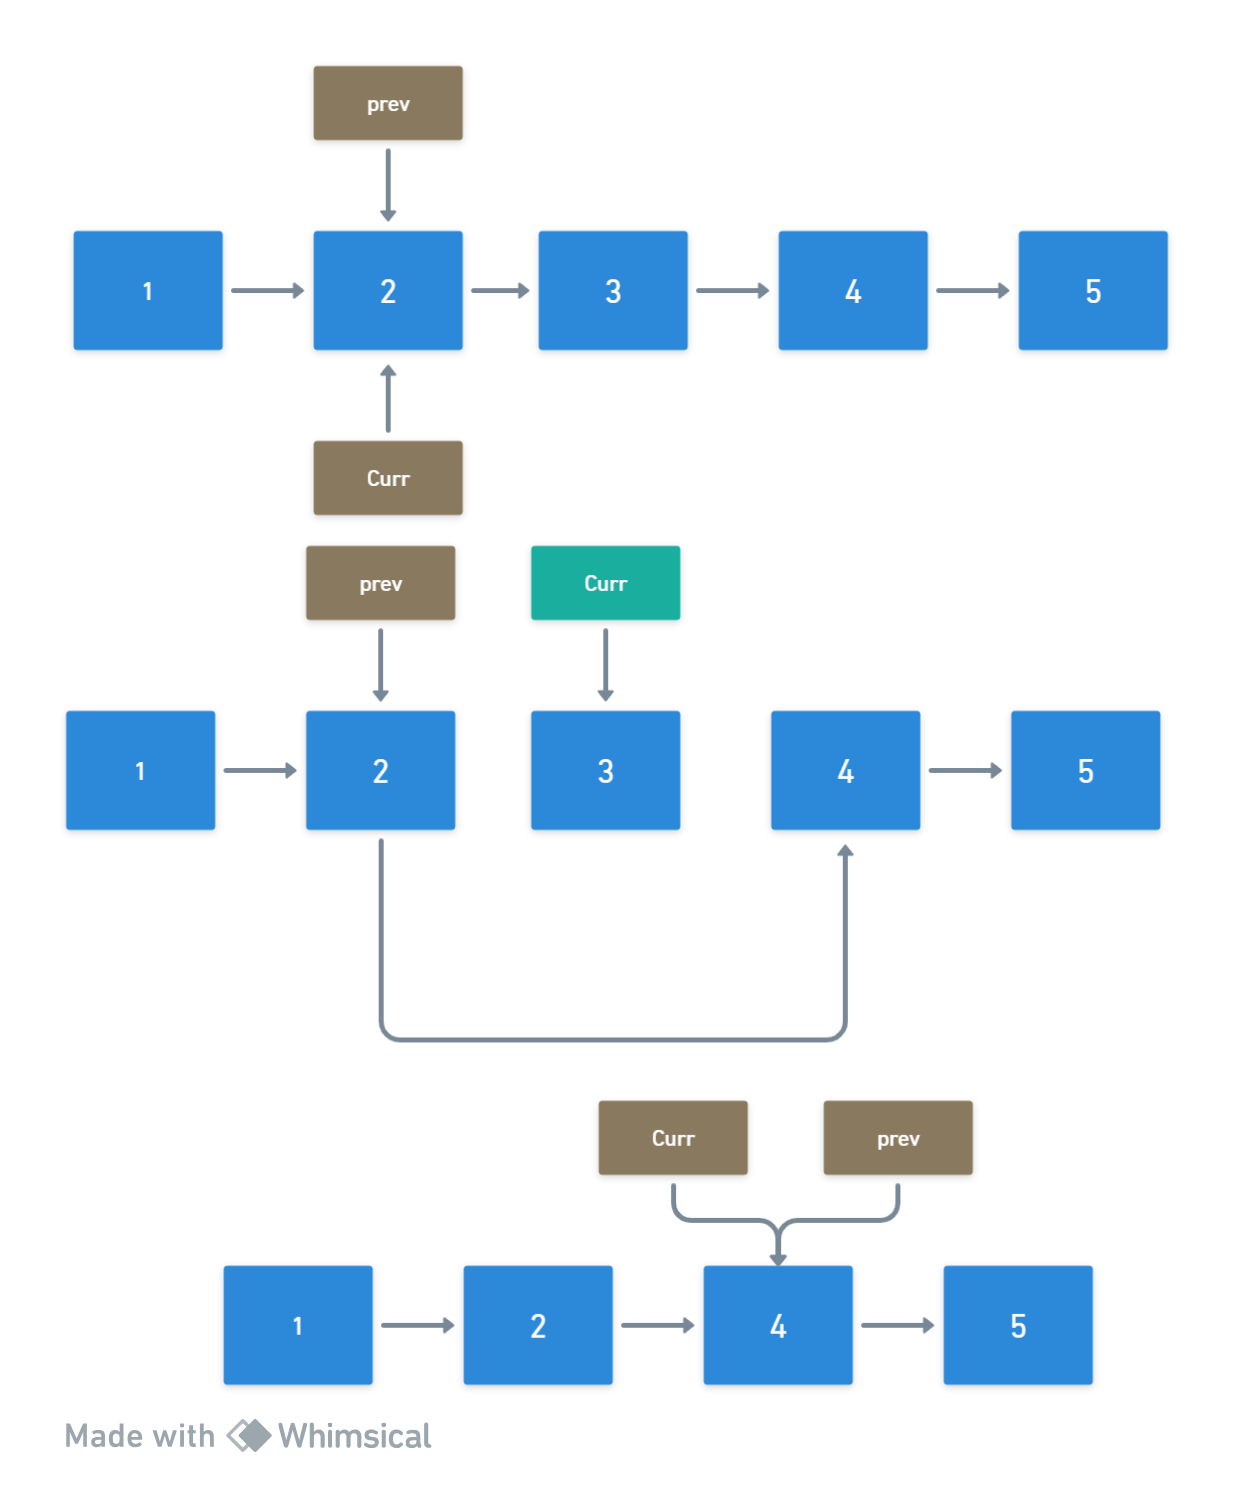

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            return
        last_node = self.head
        while last_node.next:
            last_node = last_node.next
        last_node.next = new_node

    def print_list(self):
        current_node = self.head
        while current_node:
            print(current_node.data, end=" -> ")
            current_node = current_node.next
        print("None")

    def remove_given_nodes(self, prev_node, current_node):
        if not prev_node:
            # If the node to be removed is the head
            self.head = current_node.next
        else:
            prev_node.next = current_node.next

    def remove_by_value(self, value):
        prev_node = None
        current_node = self.head

        while current_node:
            if current_node.data == value:
                self.remove_given_nodes(prev_node, current_node)
                return
            prev_node = current_node
            current_node = current_node.next

# Example usage:
ll = LinkedList()
ll.append(1)
ll.append(2)
ll.append(3)
ll.append(4)

print("Original linked list:")
ll.print_list()

# Remove a specific element (e.g., 3)
element_to_remove = 3
ll.remove_by_value(element_to_remove)

print(f"\nLinked list after removing {element_to_remove}:")
ll.print_list()


### Check Palindrome

In [5]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            return
        last_node = self.head
        while last_node.next:
            last_node = last_node.next
        last_node.next = new_node

    def print_list(self):
        current_node = self.head
        while current_node:
            print(current_node.data, end=" -> ")
            current_node = current_node.next
        print("None")

    def reverse(self, head):
        prev_node = None
        current_node = head
        while current_node:
            next_node = current_node.next
            current_node.next = prev_node
            prev_node = current_node
            current_node = next_node
        return prev_node

    def is_palindrome(self):
        if not self.head or not self.head.next:
            return True

        slow = self.head
        fast = self.head
        while fast.next and fast.next.next:
            slow = slow.next
            fast = fast.next.next

        # Reverse the second half of the list
        second_half = self.reverse(slow.next)

        # Check for palindrome
        first_half = self.head
        while second_half:
            if first_half.data != second_half.data:
                return False
            first_half = first_half.next
            second_half = second_half.next
        return True

# Example usage:
ll = LinkedList()
ll.append(1)
ll.append(2)
ll.append(3)
ll.append(2)
ll.append(1)

print("Original linked list:")
ll.print_list()

is_palindrome = ll.is_palindrome()

if is_palindrome:
    print("\nThe linked list is a palindrome.")
else:
    print("\nThe linked list is not a palindrome.")


Original linked list:
1 -> 2 -> 3 -> 2 -> 1 -> None

The linked list is a palindrome.


### Sort Linked List

#### Recursive to srt the linked List

In [6]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            return
        last_node = self.head
        while last_node.next:
            last_node = last_node.next
        last_node.next = new_node

    def print_list(self):
        current_node = self.head
        while current_node:
            print(current_node.data, end=" -> ")
            current_node = current_node.next
        print("None")

    def merge(self, left, right):
        result = None

        if not left:
            return right
        if not right:
            return left

        if left.data <= right.data:
            result = left
            result.next = self.merge(left.next, right)
        else:
            result = right
            result.next = self.merge(left, right.next)

        return result

    def sort(self, head):
        if not head or not head.next:
            return head

        mid = self.get_middle(head)
        next_to_mid = mid.next
        mid.next = None

        left = self.sort(head)
        right = self.sort(next_to_mid)

        sorted_list = self.merge(left, right)

        return sorted_list

    def get_middle(self, head):
        if not head:
            return head

        slow = head
        fast = head

        while fast.next and fast.next.next:
            slow = slow.next
            fast = fast.next.next

        return slow

    def sort_linked_list(self):
        self.head = self.sort(self.head)

# Example usage:
ll = LinkedList()
ll.append(5)
ll.append(3)
ll.append(7)
ll.append(2)
ll.append(8)
ll.append(4)

print("Original linked list:")
ll.print_list()

ll.sort_linked_list()

print("\nSorted linked list:")
ll.print_list()


Original linked list:
5 -> 3 -> 7 -> 2 -> 8 -> 4 -> None

Sorted linked list:
2 -> 3 -> 4 -> 5 -> 7 -> 8 -> None


#### Merge K Sorted Lists

#### Add Two Numbers

In [ ]:
#### 

### Linked List Cycle 

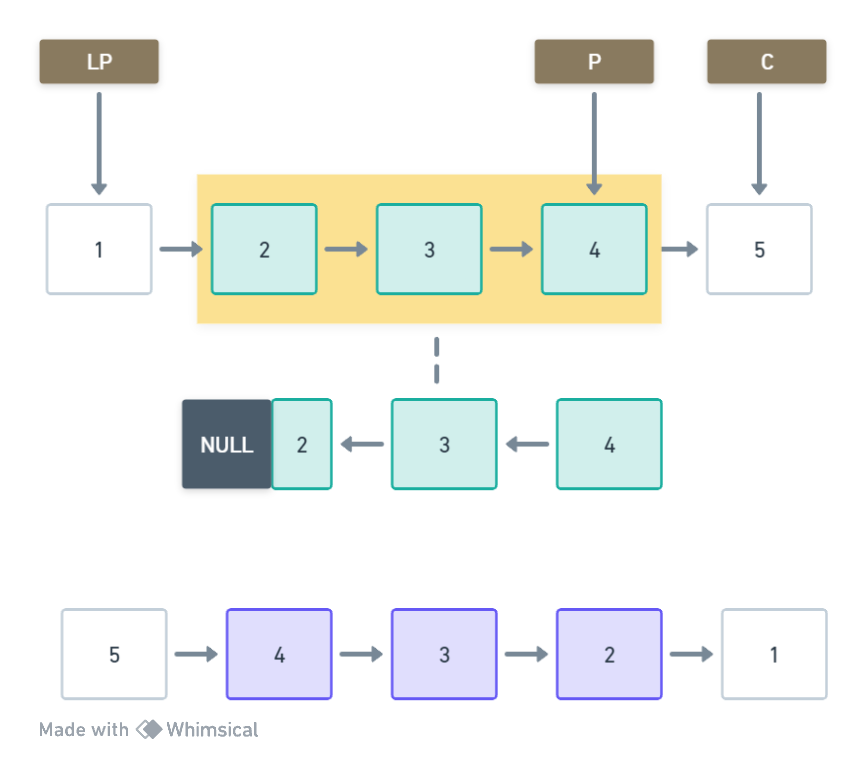

###